In [1]:
from keras.datasets import imdb

/home/rohit/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_labels[:10]

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [4]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [5]:
test_data.shape

(25000,)

In [6]:
from keras import layers
from keras import models

In [7]:
len(train_data[0])

292

In [8]:
len(train_data[1])

92

In [9]:
word_index=imdb.get_word_index()

In [10]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
reverse_word_index = { index:word for word, index in word_index.items() }

In [12]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
' '.join([reverse_word_index.get(x-3, '?') for x in train_data[1]])

"? i don't know why this conduct was ever ? in the movie business this movie short is gross to say the least it is a bunch of 5 7 year old children wearing ? with big bobby ? acting like adults and too much so however it is interesting because it is a good example of how the good old days may not have been so good after all thank god we have laws against this kind of material now br br this is one short from the shirley temple festival"

In [14]:
import numpy as np

In [15]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [26]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
y_train = train_labels.astype('float32')
y_test  = test_labels.astype('float32')

In [19]:
x_train.shape

(25000, 10000)

In [27]:
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [47]:
network = models.Sequential()

network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = network.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.5719 - acc: 0.7347 - val_loss: 0.4082 - val_acc: 0.8615
Epoch 2/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.3016 - acc: 0.9024 - val_loss: 0.2940 - val_acc: 0.8866
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1979 - acc: 0.9356 - val_loss: 0.2774 - val_acc: 0.8892
Epoch 4/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1480 - acc: 0.9537 - val_loss: 0.2944 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1152 - acc: 0.9676 - val_loss: 0.2983 - val_acc: 0.8840
Epoch 6/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.0902 - acc: 0.9783 - val_loss: 0.3238 - val_acc: 0.8789
Epoch 7/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.0710 - acc: 0.9839 - val_loss: 0.3398 - val_ac

In [49]:
network.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 80us/step


[0.7354868338179589, 0.8536]

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [52]:
history_dict = history.history

In [53]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [54]:
epochs = range(1, len(loss_values)+1)

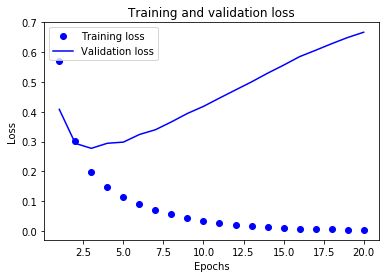

In [55]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [56]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

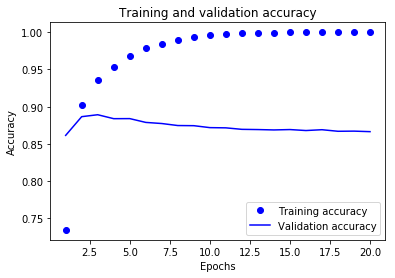

In [57]:
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()